In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### loading dataset

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Setting ‘PassengerId’ as the index column

In [3]:
data=data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### checking for the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data.drop('Cabin',axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

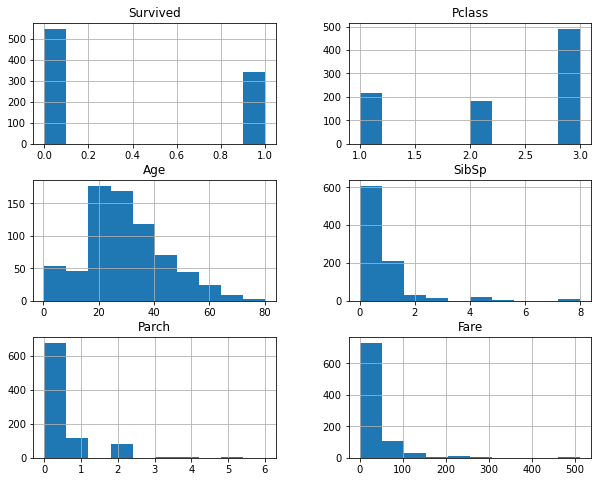

In [9]:
data.hist(figsize=(10,8))

#### Handling missing values

In [10]:
#filling missing values in col 'Age' with median
data['Age']=data['Age'].fillna(data['Age'].median())

In [11]:
data['Embarked'].mode()      

0    S
Name: Embarked, dtype: object

In [12]:
#filling missing values in col 'Embarked' with mode since its categorical
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

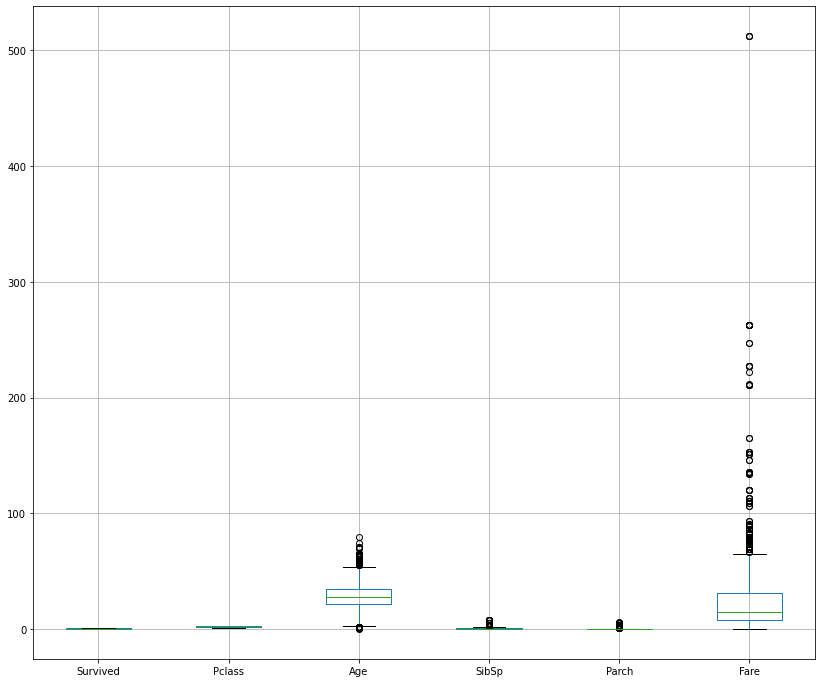

In [14]:
data.boxplot(figsize=(14,12))

#### outlier detection using boxplot

Text(0.5, 1.0, 'Box plot of Fare column ')

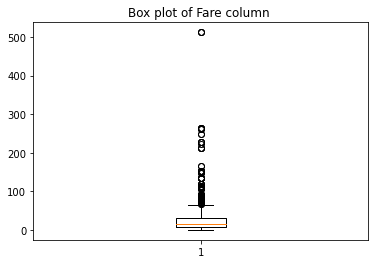

In [15]:
#outlier detection using boxplot of col 'Fare'
plt.boxplot(data['Fare'])                            
plt.title('Box plot of Fare column ')

In [16]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


<ipython-input-16-2db5ca939699>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
<ipython-input-16-2db5ca939699>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
<ipython-input-16-2db5ca939699>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.per

In [17]:
IQR = Q3-Q1

In [18]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [19]:
outlier = []
for x in data['Fare']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [20]:
data[data['Fare']<low_lim].index

Int64Index([], dtype='int64', name='PassengerId')

In [21]:
data[data['Fare']>up_lim].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [22]:
data.drop(data[data['Fare']>up_lim].index,inplace=True)

Text(0.5, 1.0, 'Box plot of Age column ')

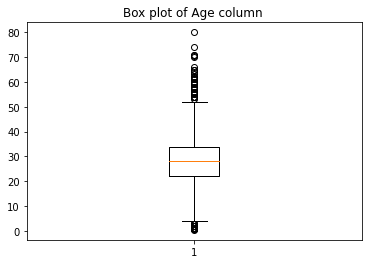

In [23]:
#outlier detection using boxplot of col 'Age'
plt.boxplot(data['Age'])                            
plt.title('Box plot of Age column ')

In [24]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

<ipython-input-24-2f4f358a73fb>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Age'],25,interpolation='midpoint')
<ipython-input-24-2f4f358a73fb>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Age'],50,interpolation='midpoint')
<ipython-input-24-2f4f358a73fb>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.perce

In [25]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [26]:
IQR = Q3-Q1

In [27]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [28]:
outlier = []
for x in data['Age']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [29]:
data[data['Age']<low_lim].index

Int64Index([  8,  17,  44,  79, 120, 165, 173, 184, 194, 206, 262, 341, 349,
            375, 382, 387, 408, 470, 480, 531, 643, 645, 756, 789, 804, 825,
            828, 832],
           dtype='int64', name='PassengerId')

In [30]:
data[data['Age']>up_lim].index

Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 457, 468, 484, 488, 493, 494, 514, 546, 556,
            571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 773, 775, 852],
           dtype='int64', name='PassengerId')

In [31]:
data.drop([ 7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 457, 468, 484, 488, 493, 494, 514, 546, 556,
            571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 773, 775, 852,8,  17,  44,  79, 120, 165, 173, 184, 194, 206, 262, 341, 349,
            375, 382, 387, 408, 470, 480, 531, 643, 645, 756, 789, 804, 825,
            828, 832])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, 'Box plot of SibSp column ')

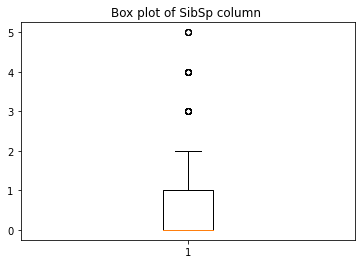

In [32]:
#outlier detection using boxplot of col 'SibSp'
plt.boxplot(data['SibSp'])                            
plt.title('Box plot of SibSp column ')

In [33]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


<ipython-input-33-32ed85fb650c>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
<ipython-input-33-32ed85fb650c>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
<ipython-input-33-32ed85fb650c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.p

In [34]:
IQR = Q3-Q1

In [35]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [36]:
outlier = []
for x in data['SibSp']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [37]:
data[data['SibSp']<low_lim].index

Int64Index([], dtype='int64', name='PassengerId')

In [38]:
data[data['SibSp']>up_lim].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [39]:
data.drop([ 8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851 ])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [40]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [41]:
data=mms.fit_transform(data[['SibSp','Parch','Fare']])